In [22]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression, make_classification, make_blobs, make_gaussian_quantiles
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, roc_curve
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')


In [ ]:
# Create directory for datasets if it doesn't exist
dataset_dir = './datasets/'
os.makedirs(dataset_dir, exist_ok=True)

In [25]:
# Function to save datasets as CSV files
def save_dataset(filename, X, y=None):
    if y is not None:
        df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))))
        columns = [f'Feature{i+1}' for i in range(X.shape[1])] + ['Target']
    else:
        df = pd.DataFrame(X)
        columns = [f'Feature{i+1}' for i in range(X.shape[1])]
    df.columns = columns
    df.to_csv(os.path.join(dataset_dir, filename), index=False)
    print(f"Sample data from {filename}:")
    print(df.head())


In [26]:
# Generate datasets for various algorithms and save them as CSV files

# Linear Regression
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
save_dataset('linear_regression.csv', X, y)

# SVM
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0)
save_dataset('svm.csv', X, y)

# Naive Bayes
X, y = make_gaussian_quantiles(n_samples=100, n_features=2, n_classes=2)
save_dataset('naive_bayes.csv', X, y)

# Logistic Regression
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0)
save_dataset('logistic_regression.csv', X, y)

# KNN
X, y = make_classification(n_samples=100, n_features=2, n_classes=3, n_clusters_per_class=1, n_informative=2, n_redundant=0)
save_dataset('knn.csv', X, y)

# Decision Tree
X, y = make_classification(n_samples=100, n_features=4, n_classes=3, n_clusters_per_class=1, n_informative=3, n_redundant=1)
save_dataset('decision_tree.csv', X, y)

# Random Forest
X, y = make_classification(n_samples=100, n_features=4, n_classes=3, n_clusters_per_class=1, n_informative=3, n_redundant=1)
save_dataset('random_forest.csv', X, y)

# Gradient Boosting
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, n_clusters_per_class=2, n_informative=3, n_redundant=1)
save_dataset('gradient_boosting.csv', X, y)

# K-Means
X, _ = make_blobs(n_samples=100, n_features=2, centers=3)
save_dataset('kmeans.csv', X)

# DBSCAN
X, _ = make_blobs(n_samples=100, n_features=2, centers=3)
save_dataset('dbscan.csv', X)

# PCA
X, _ = make_classification(n_samples=100, n_features=4, n_classes=2, n_clusters_per_class=1, n_informative=3, n_redundant=1)
save_dataset('pca.csv', X)

print("Datasets generated and saved successfully.")


Sample data from linear_regression.csv:
   Feature1     Target
0  0.407510  19.295383
1  1.121057  53.392550
2 -1.194467 -56.839007
3  0.216212  10.190331
4  0.052990   2.449550
Sample data from svm.csv:
   Feature1  Feature2  Target
0 -0.613620  1.076367     1.0
1 -0.140424 -1.073208     0.0
2  1.274802  0.788420     0.0
3 -0.883493 -0.453147     0.0
4 -1.231831  1.223535     1.0
Sample data from naive_bayes.csv:
   Feature1  Feature2  Target
0 -0.008724 -0.153902     0.0
1 -0.478566 -1.711246     1.0
2 -0.930504  0.009620     0.0
3 -0.741917 -1.533961     1.0
4  0.639517  1.068737     0.0
Sample data from logistic_regression.csv:
   Feature1  Feature2  Target
0 -0.853905 -1.633345     1.0
1 -0.209656  1.574187     0.0
2 -0.531327 -1.237956     1.0
3 -0.683876 -1.756327     1.0
4 -1.518998 -0.591910     1.0
Sample data from knn.csv:
   Feature1  Feature2  Target
0 -1.019539  1.127216     0.0
1  0.589227 -1.882367     1.0
2 -1.681542 -0.784398     0.0
3  0.419893 -1.216078     1.0
4 -0

### Model Training, Visualization, and Detailed Explanations

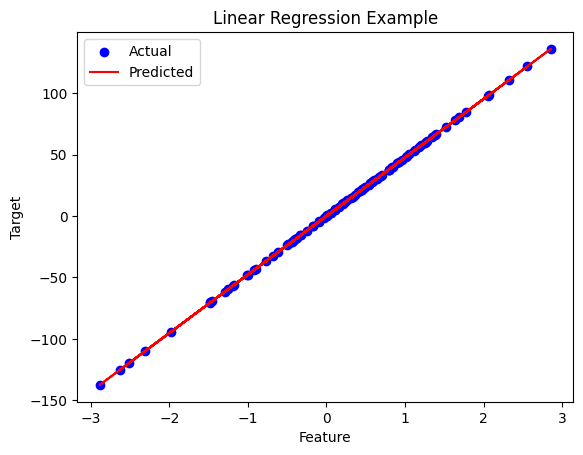

In [27]:
# Linear Regression

# Explanation:
# What: Linear Regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables.
# Why: It is used to predict the value of a dependent variable based on the value(s) of the independent variable(s).
# How: It assumes a linear relationship between the dependent and independent variables.
# Measured by: The goodness of fit is measured by R-squared, Mean Squared Error (MSE), etc.

# Load dataset
df = pd.read_csv('./datasets/linear_regression.csv')
X = df[['Feature1']].values
y = df['Target'].values

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Notes:
# The blue dots represent the actual data points.
# The red line represents the predictions made by the linear regression model.
# Linear regression is widely used in finance, economics, and many other fields for predictive analysis.


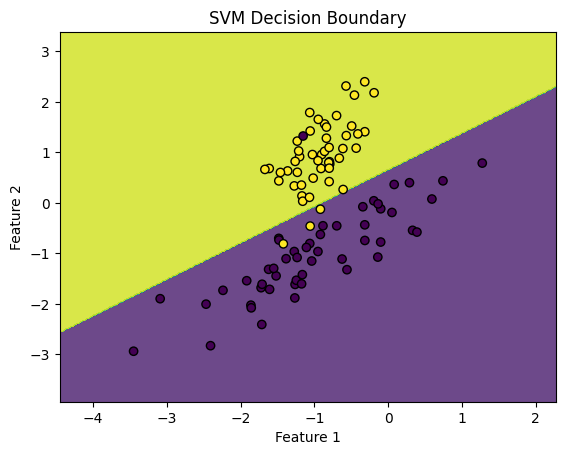

In [28]:
# SVM

# Explanation:
# What: Support Vector Machine (SVM) is a supervised learning model used for classification and regression analysis.
# Why: It is effective in high-dimensional spaces and is still effective when the number of dimensions is greater than the number of samples.
# How: It finds the hyperplane that best separates the classes in the feature space.
# Measured by: Accuracy, Precision, Recall, F1-score, etc.

# Load dataset
df = pd.read_csv('./datasets/svm.csv')
X = df[['Feature1', 'Feature2']].values
y = df['Target'].values

# Create and train model
model = SVC(kernel='linear')
model.fit(X, y)

# Plotting decision boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, model)

# Notes:
# The plot shows the decision boundary created by the SVM.
# Points on either side of the boundary belong to different classes.
# SVM is used in image recognition, text categorization, and bioinformatics.


In [29]:
# Naive Bayes

# Explanation:
# What: Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
# Why: It is used for text classification, spam filtering, and sentiment analysis.
# How: It calculates the probability of each class based on the given features and selects the class with the highest probability.
# Measured by: Accuracy, Precision, Recall, F1-score, etc.

# Load dataset
df = pd.read_csv('./datasets/naive_bayes.csv')
X = df[['Feature1', 'Feature2']].values
y = df['Target'].values

# Create and train model
model = GaussianNB()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y, y_pred))

# Notes:
# Naive Bayes is particularly suited for high-dimensional datasets.
# Despite its simplicity, it performs surprisingly well in many real-world applications.


Accuracy: 0.94
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        50
         1.0       0.92      0.96      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



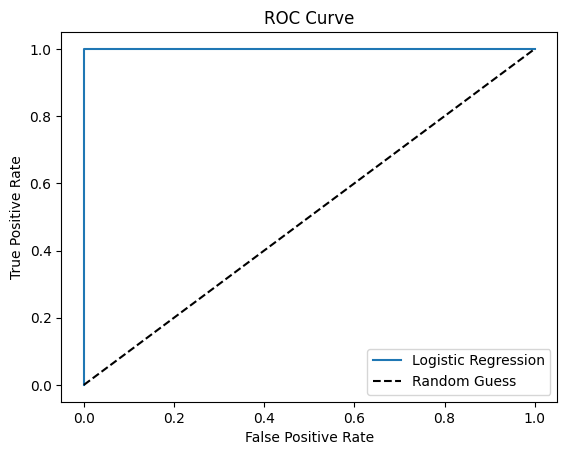

In [30]:
# Logistic Regression

# Explanation:
# What: Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome.
# Why: It is used for binary classification problems.
# How: It models the probability that a given input belongs to a certain class.
# Measured by: Accuracy, Precision, Recall, F1-score, ROC-AUC, etc.

# Load dataset
df = pd.read_csv('./datasets/logistic_regression.csv')
X = df[['Feature1', 'Feature2']].values
y = df['Target'].values

# Create and train model
model = LogisticRegression(max_iter=10000)
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y, y_pred))

# ROC Curve
y_prob = model.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Notes:
# Logistic Regression is widely used in medical and social science research.
# It helps in understanding the relationship between the dependent binary variable and one or more independent variables.


In [31]:
# KNN

# Explanation:
# What: K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm.
# Why: It is used for classification and regression tasks.
# How: It assigns a class to a sample based on the majority class of its k nearest neighbors in the feature space.
# Measured by: Accuracy, Precision, Recall, F1-score, etc.

# Load dataset
df = pd.read_csv('./datasets/knn.csv')
X = df[['Feature1', 'Feature2']].values
y = df['Target'].values

# Create and train model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y, y_pred))

# Notes:
# KNN is non-parametric and lazy learning algorithm.
# It is widely used in pattern recognition, data mining, and intrusion detection.


Accuracy: 0.95
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        36
         1.0       1.00      0.94      0.97        33
         2.0       0.91      0.94      0.92        31

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        33
         1.0       1.00      1.00      1.00        33
         2.0       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



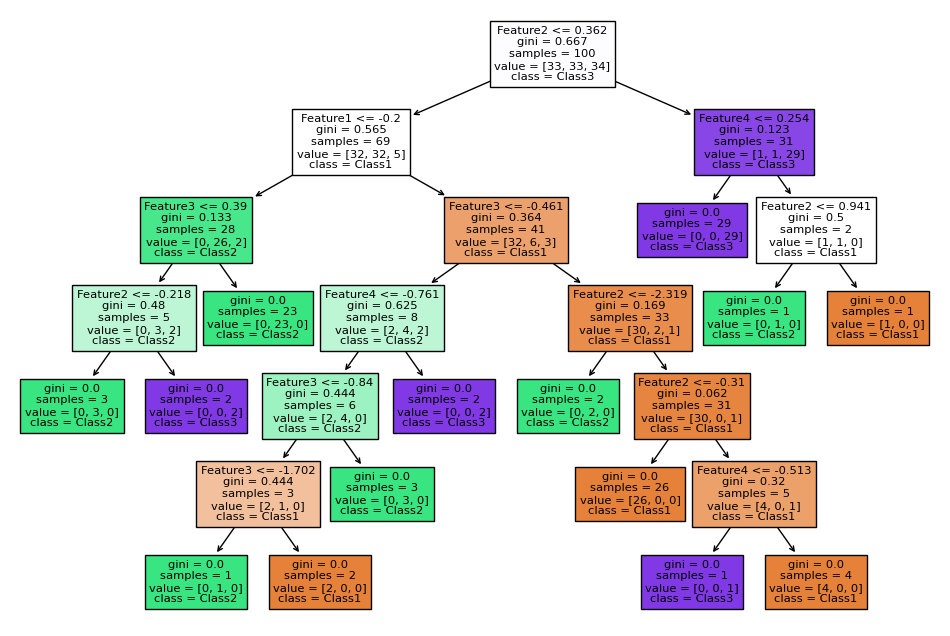

In [32]:
# Decision Tree

# Explanation:
# What: Decision Trees are used for classification and regression tasks.
# Why: They are easy to understand and interpret.
# How: They work by splitting the data into subsets based on the value of input features. This process is repeated recursively to build a tree.
# Measured by: Accuracy, Precision, Recall, F1-score, etc.

# Load dataset
df = pd.read_csv('./datasets/decision_tree.csv')
X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4']].values
y = df['Target'].values

# Create and train model
model = DecisionTreeClassifier()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y, y_pred))

# Plot tree
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=['Feature1', 'Feature2', 'Feature3', 'Feature4'], class_names=['Class1', 'Class2', 'Class3'])
plt.show()

# Notes:
# Decision Trees are widely used in decision analysis, risk management, and machine learning.
# They can handle both numerical and categorical data.


In [33]:
# Random Forest

# Explanation:
# What: Random Forest is an ensemble learning method that constructs multiple decision trees during training.
# Why: It improves the accuracy and reduces the risk of overfitting.
# How: The output is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
# Measured by: Accuracy, Precision, Recall, F1-score, etc.

# Load dataset
df = pd.read_csv('./datasets/random_forest.csv')
X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4']].values
y = df['Target'].values

# Create and train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y, y_pred))

# Notes:
# Random Forest is widely used in finance, medicine, and remote sensing.
# It handles large datasets with higher dimensionality very well.


Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        35
         1.0       1.00      1.00      1.00        32
         2.0       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [34]:
# Gradient Boosting

# Explanation:
# What: Gradient Boosting is an ensemble technique that builds models sequentially.
# Why: Each new model corrects the errors of the previous models.
# How: It is widely used for classification and regression tasks due to its high predictive accuracy.
# Measured by: Accuracy, Precision, Recall, F1-score, etc.

# Load dataset
df = pd.read_csv('./datasets/gradient_boosting.csv')
X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4']].values
y = df['Target'].values

# Create and train model
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y, y_pred))

# Notes:
# Gradient Boosting is widely used in web search ranking, fraud detection, and customer churn prediction.
# It often provides better predictive accuracy than single models.


Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



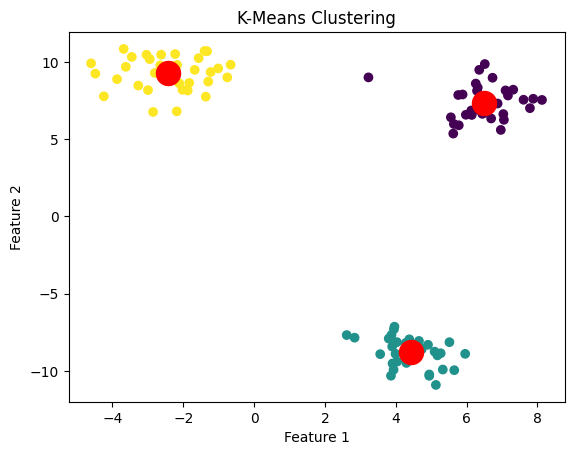

In [35]:
# K-Means

# Explanation:
# What: K-Means is a clustering algorithm that partitions the dataset into K distinct clusters.
# Why: It is used for exploratory data analysis and pattern recognition.
# How: It minimizes the variance within each cluster.
# Measured by: Sum of Squared Distances (SSD), silhouette score, etc.

import os

# Set the environment variable to avoid memory leak on Windows
os.environ['OMP_NUM_THREADS'] = '1'

# Import KMeans after setting the environment variable
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('./datasets/kmeans.csv')
X = df[['Feature1', 'Feature2']].values

# Create and train model
model = KMeans(n_clusters=3, n_init=10)
model.fit(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

# Notes:
# K-Means is commonly used for customer segmentation, image compression, and pattern recognition.
# The red points represent the centroids of the clusters.


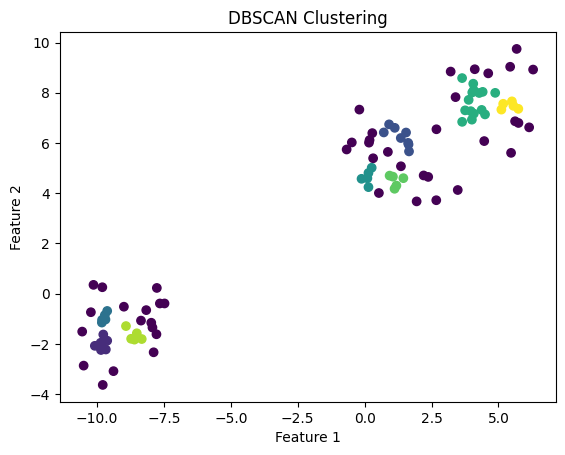

In [36]:
# DBSCAN

# Explanation:
# What: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm.
# Why: It can find arbitrarily shaped clusters and is robust to noise.
# How: It groups together points that are close to each other based on a distance measurement and a minimum number of points.
# Measured by: Silhouette score, Davies-Bouldin index, etc.

# Load dataset
df = pd.read_csv('./datasets/dbscan.csv')
X = df[['Feature1', 'Feature2']].values

# Create and train model
model = DBSCAN(eps=0.5, min_samples=5)
model.fit(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

# Notes:
# DBSCAN is used in anomaly detection, fraud detection, and geographic data analysis.
# It does not require specifying the number of clusters in advance.


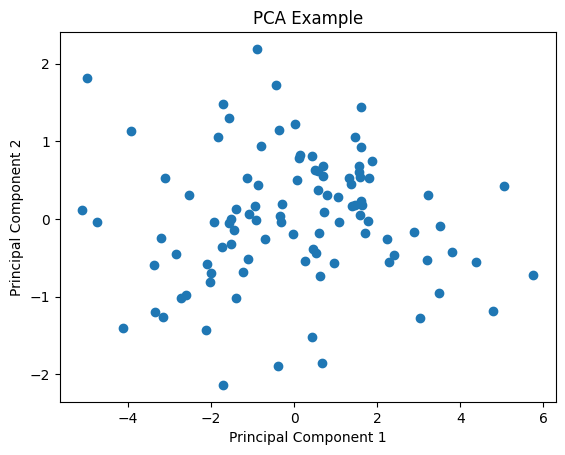

In [37]:
# PCA

# Explanation:
# What: Principal Component Analysis (PCA) is a dimensionality reduction technique.
# Why: It is used to reduce the dimensionality of large datasets, increasing interpretability while minimizing information loss.
# How: It transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
# Measured by: Explained variance ratio, Scree plot, etc.

# Load dataset
df = pd.read_csv('./datasets/pca.csv')
X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4']].values

# Create and train model
model = PCA(n_components=2)
X_pca = model.fit_transform(X)

# Plot results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Example')
plt.show()

# Notes:
# PCA is widely used in exploratory data analysis and for making predictive models.
# It helps in visualizing high-dimensional data.
